In [1]:
# Import modules
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")
import matplotlib.pyplot as plt

# Toyデータセット"digits"/"diabetes"/"msft"の特徴量をseabornで可視化

- digits
     1. 棒グラフ: 数字ごとのカウント数(catplot/count)
     1. ヒートマップ: 1文字ごとの画像(heatmap)
     1. ファセット: 1文字ごとの画像(FacetGrid+heatmap)
     1. ファセット: 数字ごとの輝度分布(FacetGrid+displot)
- diabetes
     1. 探索的データ解析(EDA): 2特徴量の相関(pairplot)
     1. 散布図: 単純な使用方法(lmplot)
     1. 散布図: 同一グラフに複数データ出力(groupby+lmplot)
- msft
     1. 時系列折れ線グラフ: 単純な使用方法(melt+catplot/point)
     1. 時系列棒グラフ: logスケールでの出力(catplot/bar)

## digits 1. 棒グラフ: 数字ごとのカウント数

In [2]:
import sklearn.datasets
digit_set = sklearn.datasets.load_digits()
print("class:{}".format(np.unique(digit_set.target)) )

df_digit = pd.DataFrame(np.column_stack((digit_set.data, digit_set.target.reshape(-1,1))), 
                       columns=np.append(digit_set.feature_names, 'class'))

# copy the index to cols, because the index is not available in certain functions
df_digit['idx'] = df_digit.index 
df_digit.index.name = "index"
df_digit

class:[0 1 2 3 4 5 6 7 8 9]


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class,idx
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0,1792
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0,1793
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0,1794


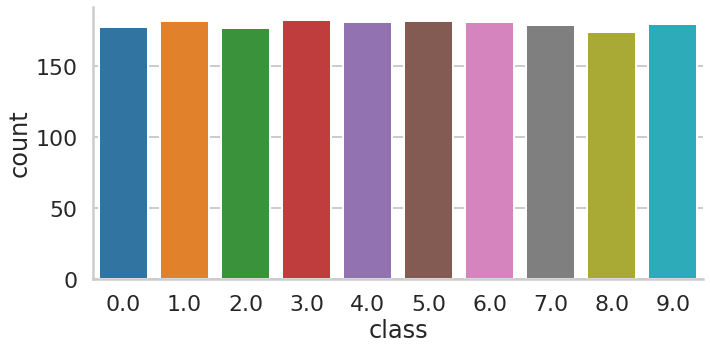

In [3]:
ax = sns.catplot(x="class", data=df_digit, kind="count", aspect=2.0)

## digits 2. ヒートマップ: 1文字ごとの画像

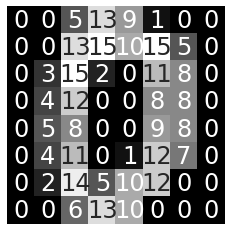

In [4]:
# create a pivot table
# if you have a DataFrame formatted with x,y, use PivotTable
# df_pivot = df_digit.pivot_table(index="y", columns="x", values="value", aggfunc="mean")
# df_pivot = df_digit.pivot(index="y", columns="x", values="value")
reshape_set = digit_set.data.reshape(-1,8,8)
ax = sns.heatmap(reshape_set[0], xticklabels=False, yticklabels=False, cmap="gray", 
                 annot=True, cbar=False, square=True)

## digits 2. ヒートマップ: 1文字ごとの画像

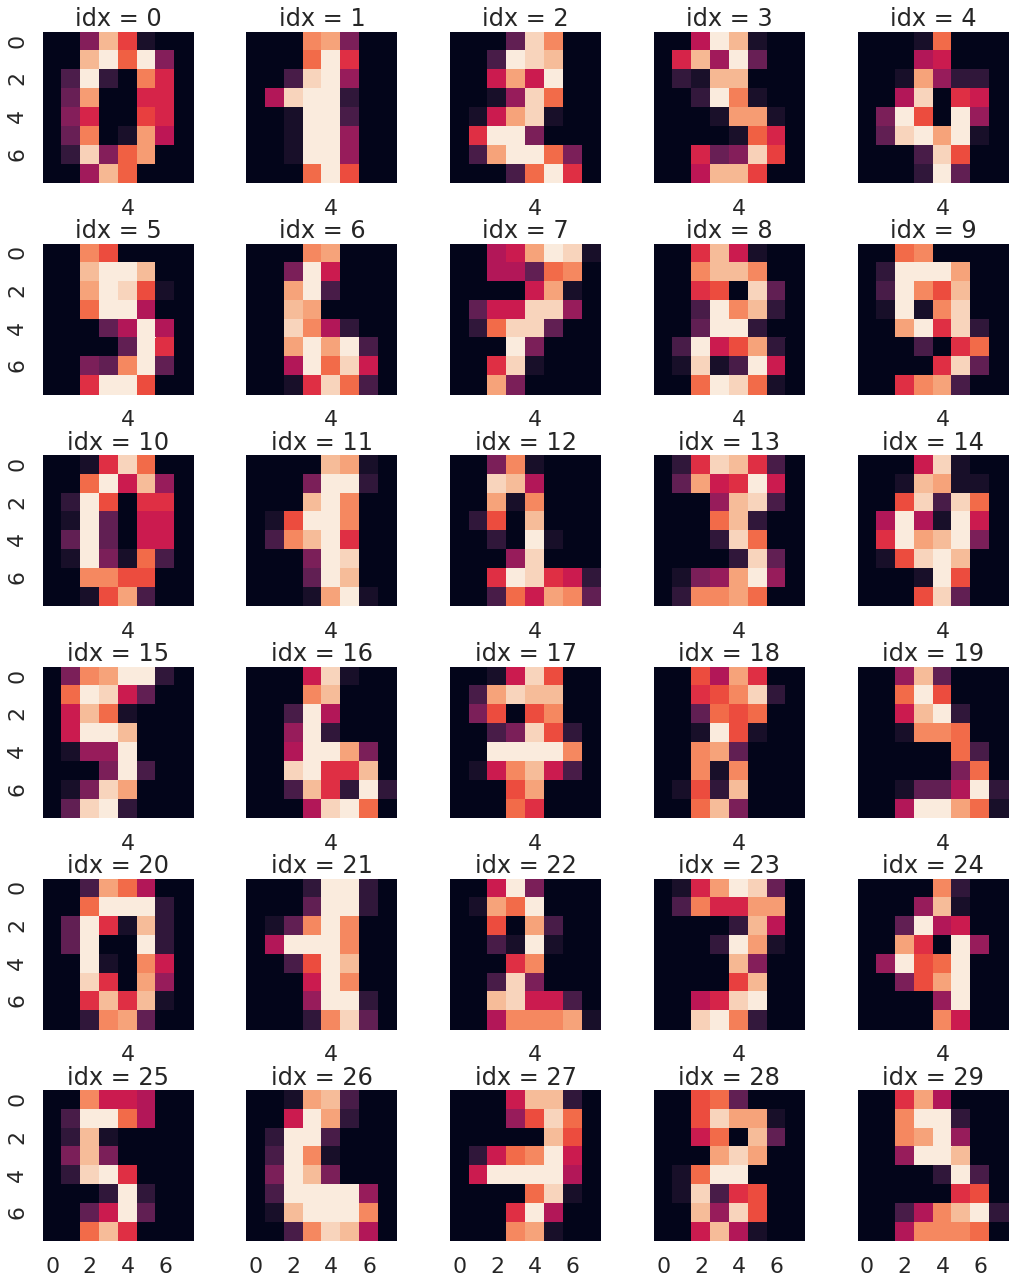

In [5]:
df_digit_subset = df_digit[:30]

def map_func(data, **kwargs):
    img = data.iloc[:,:len(digit_set.feature_names)].values.reshape(8,8)
    sns.heatmap(img, cbar=False, square=True, **kwargs)

facet = sns.FacetGrid(df_digit_subset, col="idx", col_wrap=5, sharex=True, sharey=True)
ax = facet.map_dataframe(map_func)

## digits 2. ヒートマップ: 1文字ごとの画像

In [6]:
df_digit_melt = df_digit_subset.melt(id_vars=["idx", "class"], value_vars=digit_set.feature_names, var_name="pix_idx", value_name="pix_val")
df_digit_melt

,idx,class,pix_idx,pix_val
0,0,0.0,pixel_0_0,0.0
1,1,1.0,pixel_0_0,0.0
2,2,2.0,pixel_0_0,0.0
3,3,3.0,pixel_0_0,0.0
4,4,4.0,pixel_0_0,0.0
...,...,...,...,...
1915,25,5.0,pixel_7_7,0.0
1916,26,6.0,pixel_7_7,0.0
1917,27,7.0,pixel_7_7,0.0
1918,28,8.0,pixel_7_7,0.0


## digits 2. ヒートマップ: 1文字ごとの画像

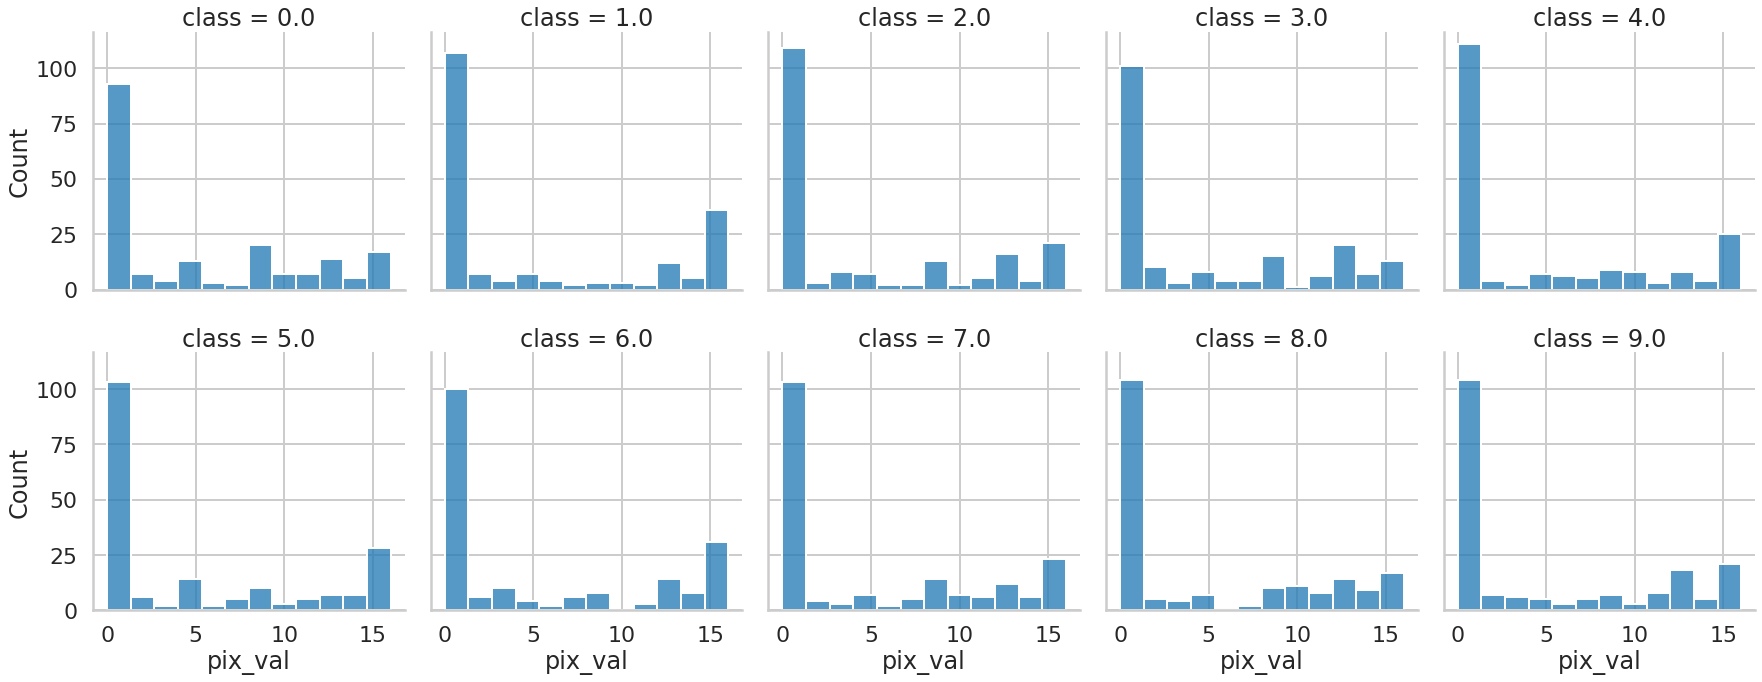

In [7]:
ax = sns.displot(df_digit_melt, x="pix_val", col="class", col_wrap=5, rug=False, kind="hist")

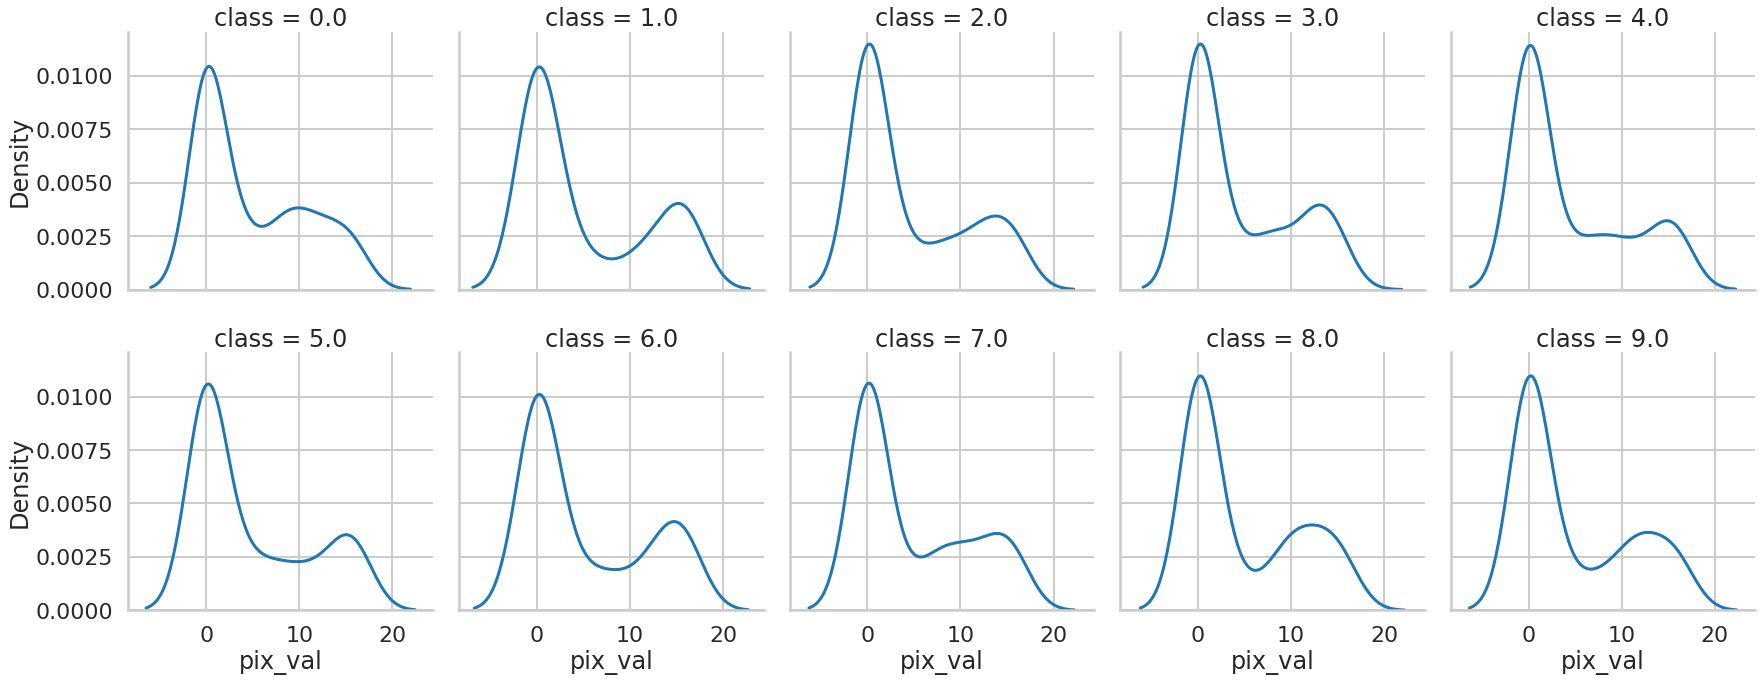

In [8]:
ax = sns.displot(df_digit_melt, x="pix_val", col="class", col_wrap=5, rug=False, kind="kde")

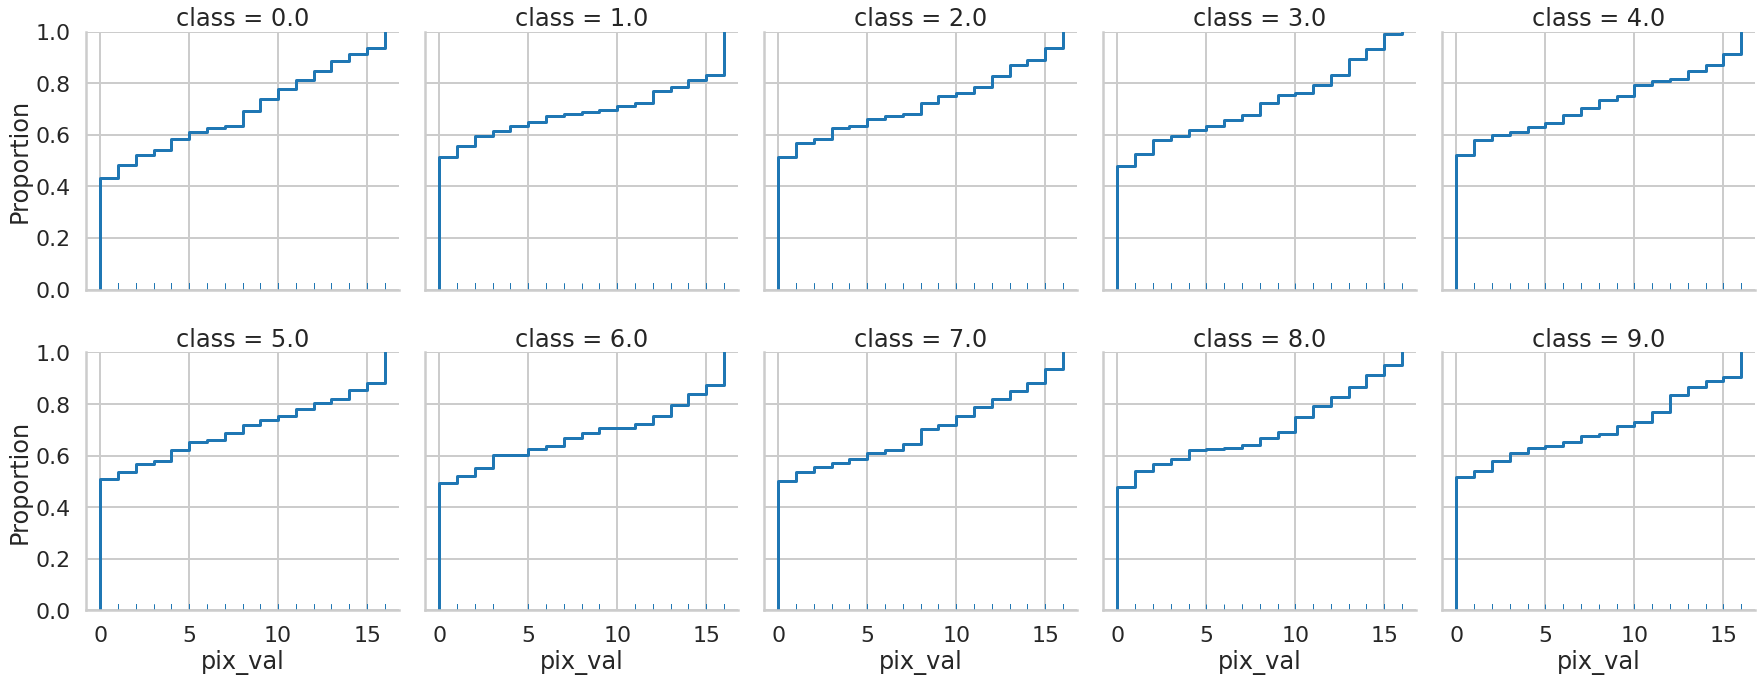

In [9]:
ax = sns.displot(df_digit_melt, x="pix_val", col="class", col_wrap=5, rug=True, kind="ecdf")

 ## diabetes 1. 探索的データ解析(EDA): 2特徴量の相関

In [10]:
X_diabete, y_diabete = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)
df_diabete = pd.concat([X_diabete, y_diabete], axis=1)
df_diabete

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


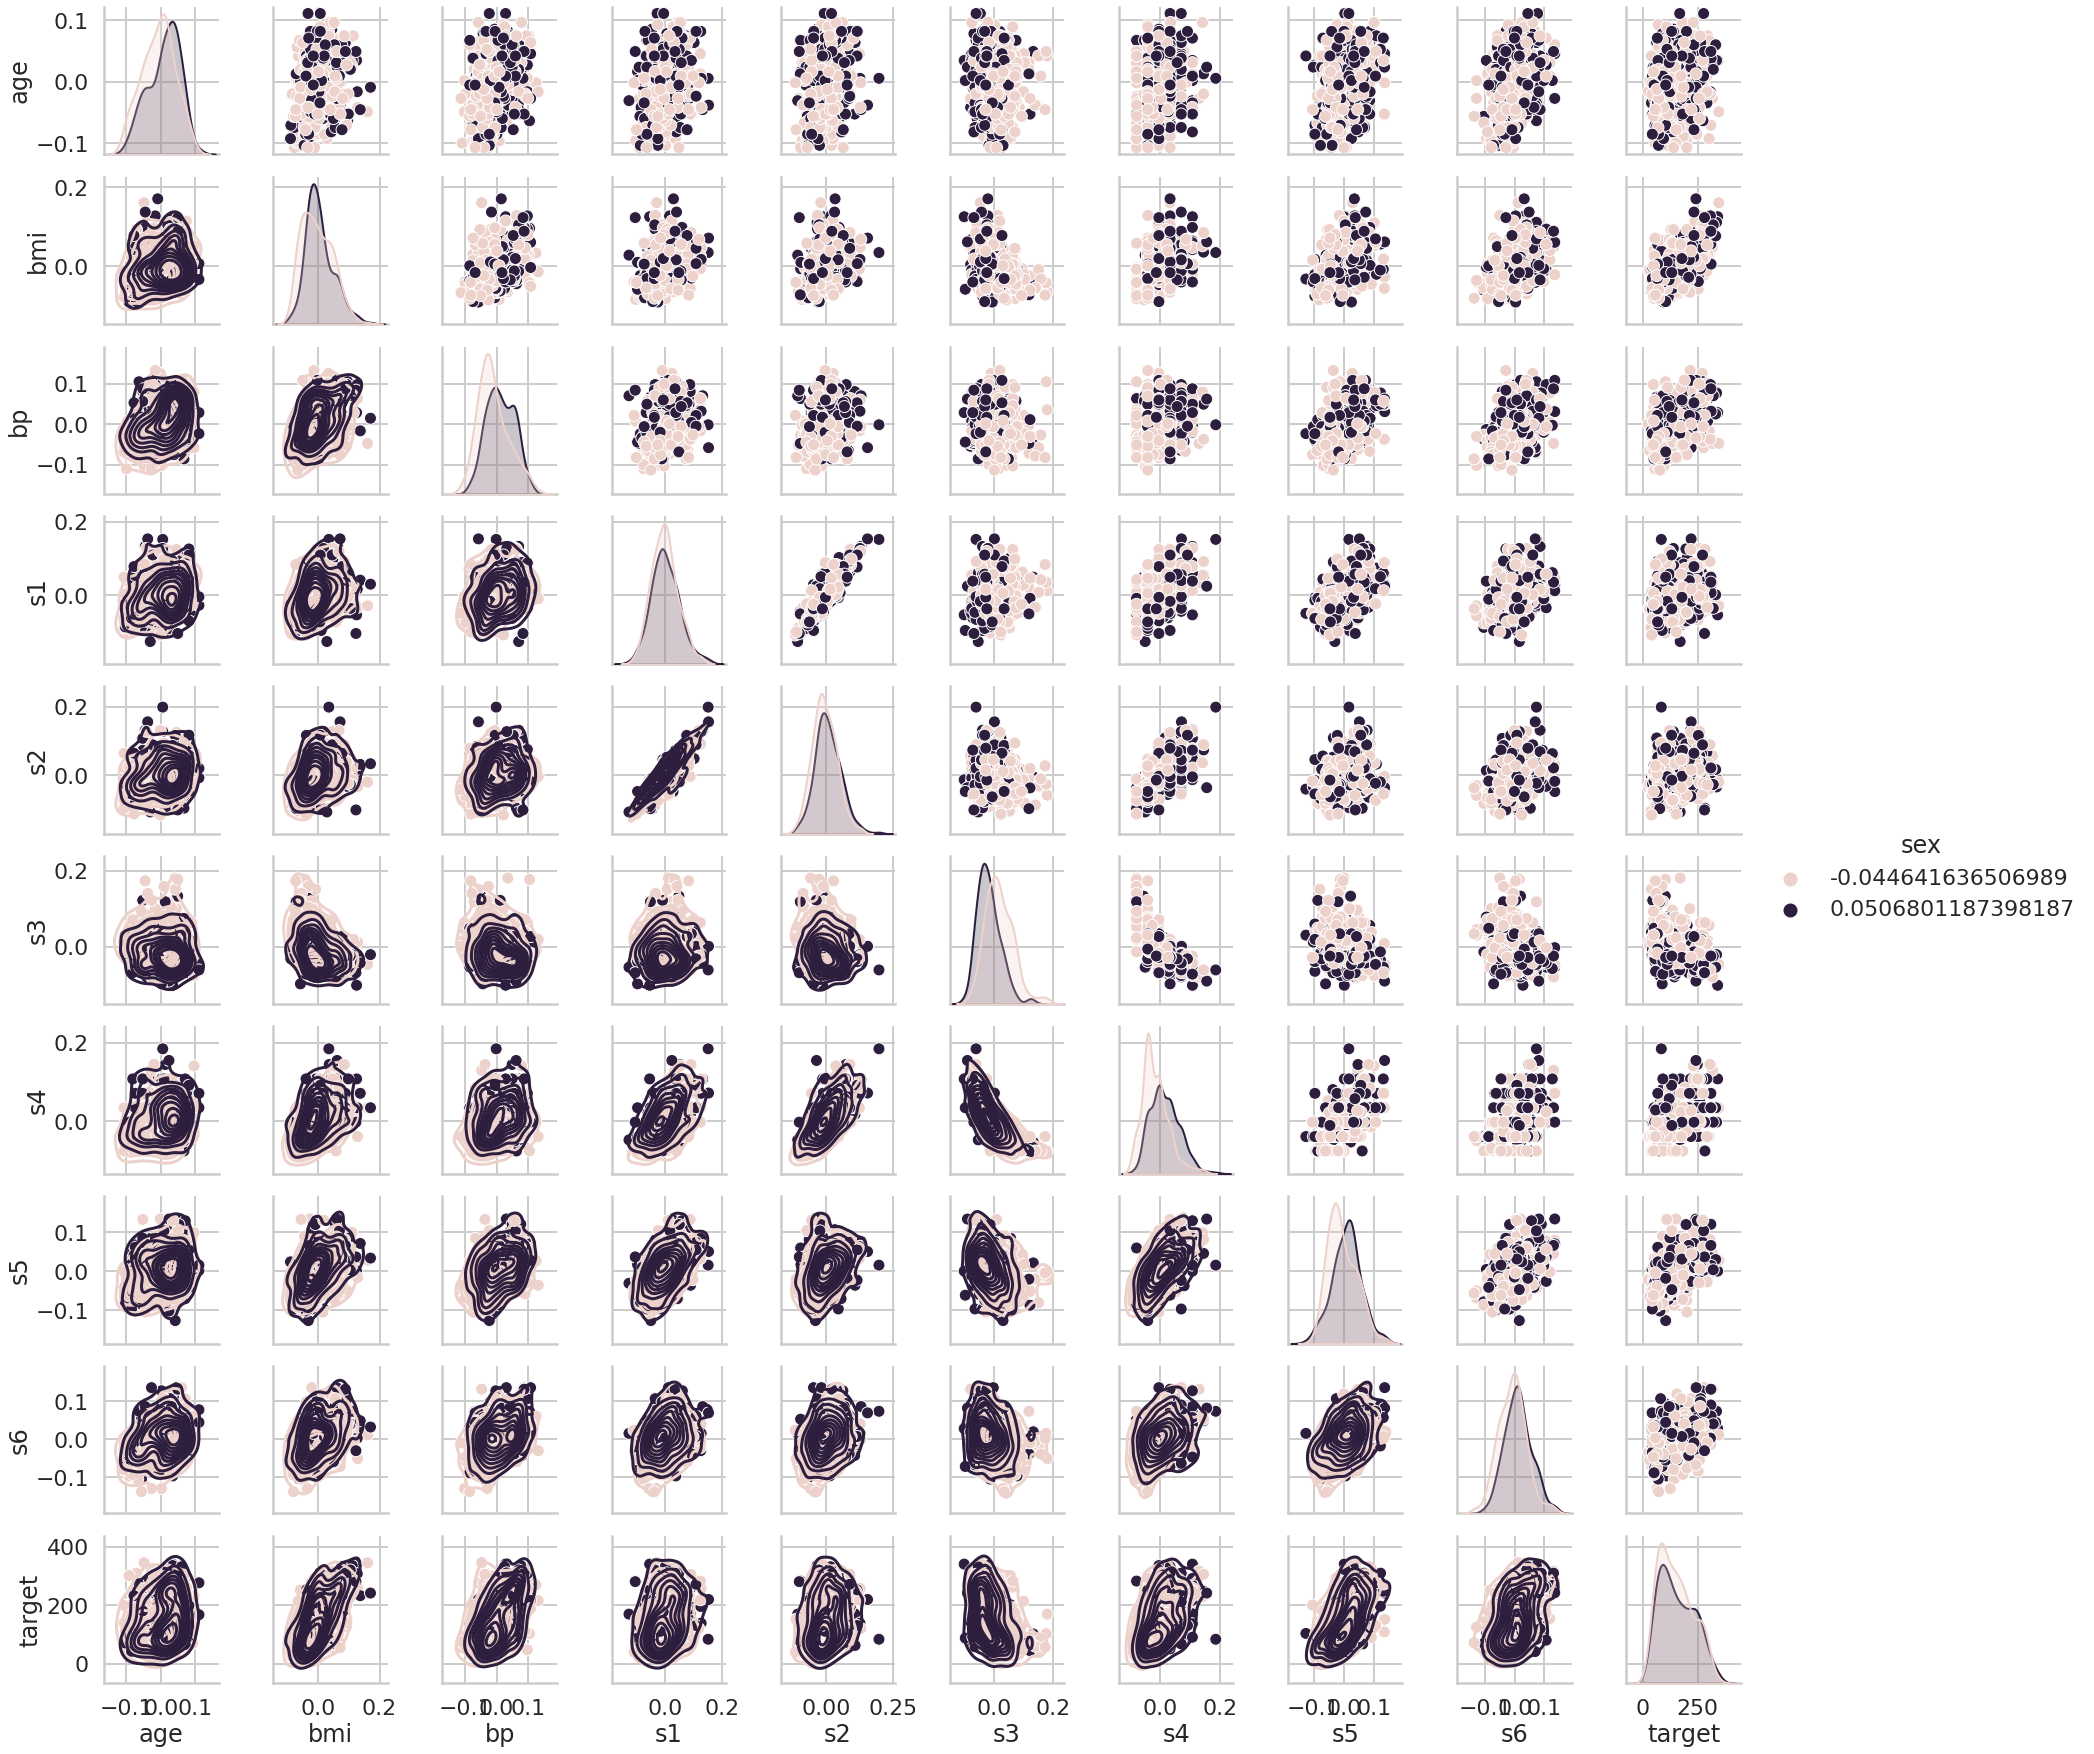

In [11]:
ax = sns.pairplot(df_diabete, hue="sex")
ax = ax.map_upper(sns.regplot)
ax = ax.map_lower(sns.kdeplot)

## diabetes 2. 散布図: 単純な使用方法

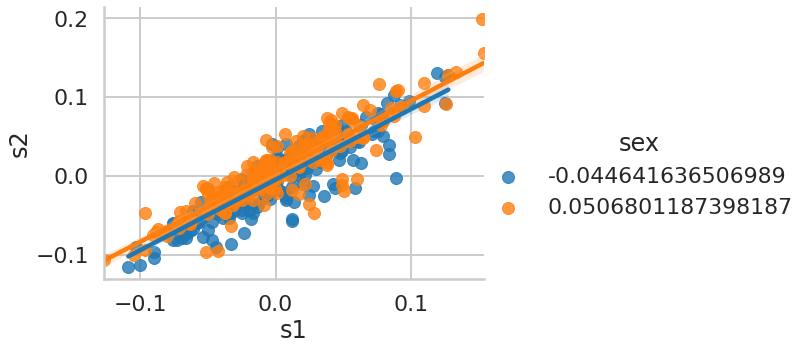

In [12]:
ax = sns.lmplot(x="s1", y="s2", hue="sex", data=df_diabete, fit_reg=True, aspect=1.5)

## diabetes 3. 散布図: 同一グラフに複数データ出力

In [13]:
groupby_age = df_diabete.groupby(["age"], as_index=False).mean()
groupby_age

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.107226,-0.044642,-0.041055,-0.044690,-0.034592,-0.034090,0.006915,-0.027193,-0.012051,-0.038357,159.000000
1,-0.103593,0.018906,-0.035666,-0.025180,-0.036426,-0.024174,0.008142,-0.027193,-0.062093,-0.050783,87.000000
2,-0.099961,-0.044642,-0.045546,-0.086578,-0.066239,-0.066449,0.013665,-0.039493,-0.033993,-0.030072,102.500000
3,-0.096328,-0.044642,-0.066563,-0.044403,-0.051791,-0.040927,0.006301,-0.048719,-0.060839,-0.049747,148.250000
4,-0.092695,-0.020811,-0.046085,-0.037517,-0.029432,-0.038187,0.034834,-0.048719,-0.022190,-0.029037,144.500000
5,-0.089063,-0.044642,-0.038181,-0.027475,-0.036426,-0.034612,0.004460,-0.027193,-0.023367,-0.031453,163.333333
6,-0.085430,0.012551,-0.015475,-0.018065,-0.035968,-0.024549,0.009615,-0.032113,-0.062237,-0.020960,95.400000
7,-0.081798,0.003019,-0.019679,-0.029771,0.021134,0.019510,0.000779,0.034309,0.018141,-0.065280,94.000000
8,-0.078165,-0.020811,-0.013212,-0.024606,-0.026680,-0.034038,0.023789,-0.039493,-0.009729,-0.059067,154.250000
9,-0.074533,0.003019,-0.010787,-0.019012,-0.019284,-0.015014,-0.003363,-0.011818,-0.015599,-0.019717,103.625000


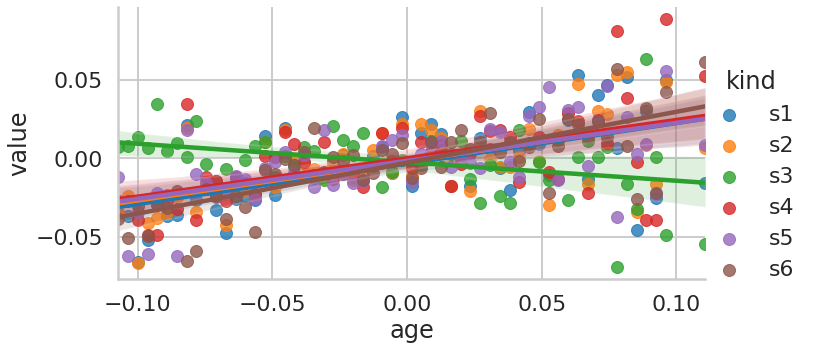

In [14]:
groupby_age_melt = groupby_age.melt(id_vars=["age"], value_vars=X_diabete.columns.values[4:], var_name="kind", value_name="value")
ax = sns.lmplot(data=groupby_age_melt, x="age", y="value", hue="kind", legend=True, fit_reg=True, aspect=2.0)

## msft 1. 時系列折れ線グラフ: 単純な使用方法

In [15]:
import pmdarima
df_msft = pmdarima.datasets.load_msft()
df_msft

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0
...,...,...,...,...,...,...,...
7978,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,0
7979,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,0
7980,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,0
7981,2017-11-09,84.11000,84.27000,82.90000,84.09000,21175384,0


In [16]:
df_msft_subset = df_msft.iloc[:50, :]
df_msft_melt = df_msft_subset.melt(id_vars=["Date"], value_vars=["Open","High","Low","Close"], var_name="kind", value_name="price")
df_msft_melt

,Date,kind,price
0,1986-03-13,Open,0.06720
1,1986-03-14,Open,0.07533
2,1986-03-17,Open,0.07533
3,1986-03-18,Open,0.07533
4,1986-03-19,Open,0.07533
...,...,...,...
195,1986-05-16,Close,0.08389
196,1986-05-19,Close,0.08389
197,1986-05-20,Close,0.08389
198,1986-05-21,Close,0.08389


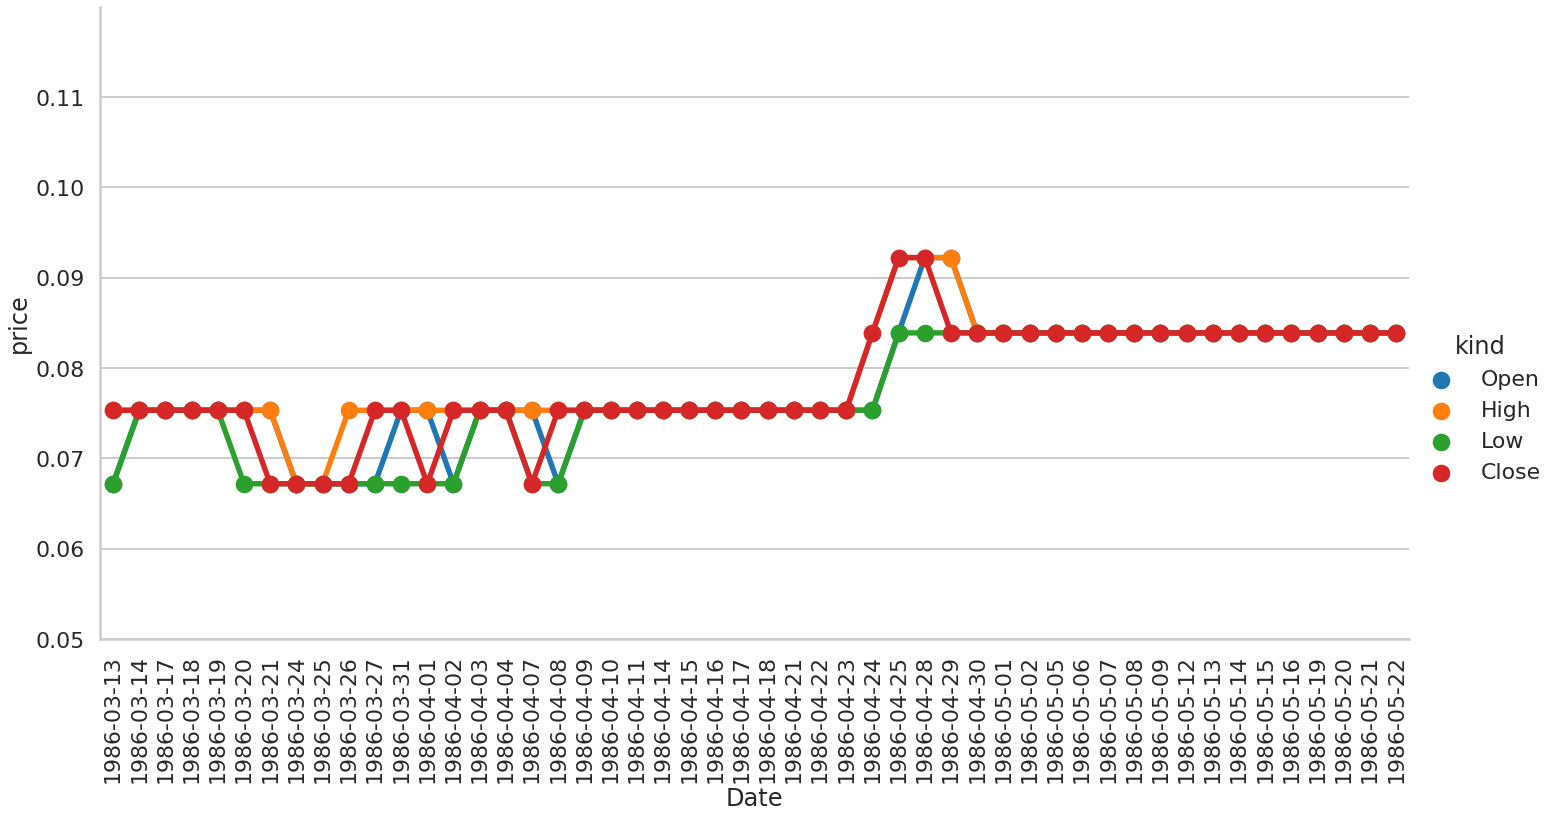

In [17]:
ax = sns.catplot(x="Date", y="price", hue="kind", data=df_msft_melt, kind="point", aspect=2.0, height=10)
ax = ax.set_xticklabels(rotation=90)
ax = ax.set(ylim=(0.05, 0.12), yticks=np.arange(0.05, 0.12, 0.01))

## msft 2. 時系列棒グラフ: logスケールでの出力

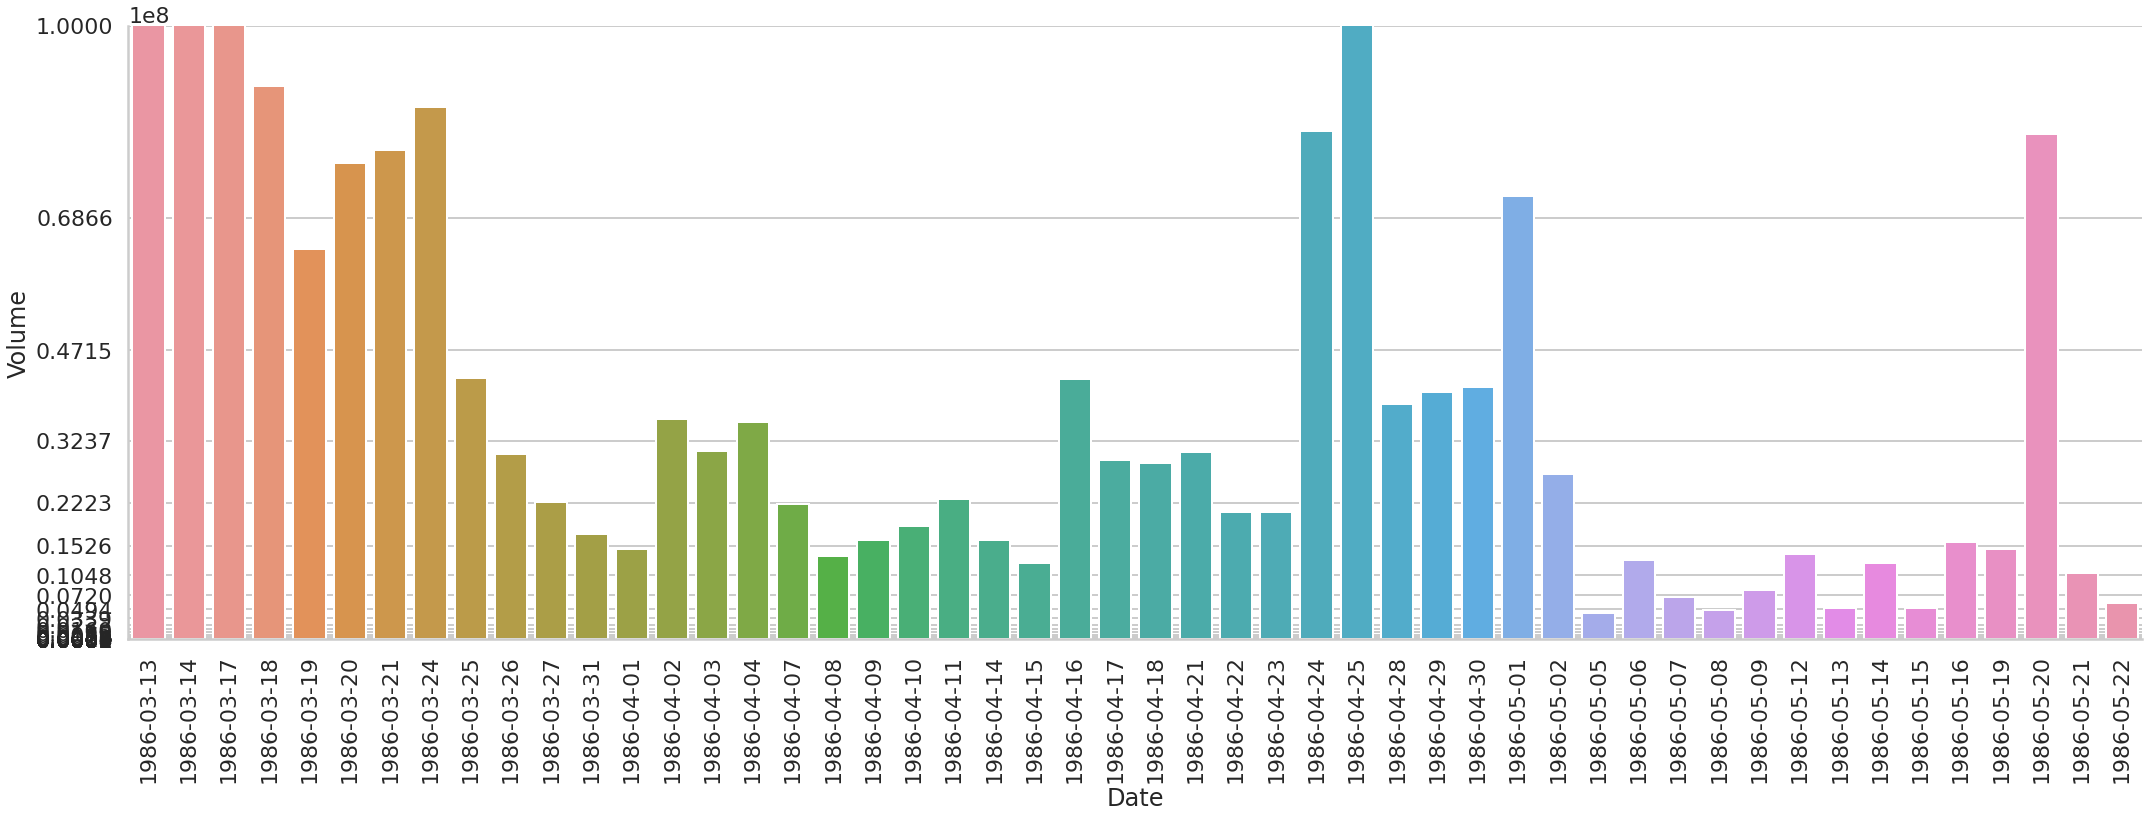

In [18]:
ax = sns.catplot(x="Date", y="Volume", data=df_msft_subset, kind="bar", aspect=3.0, height=10)
ax = ax.set_xticklabels(rotation=90)
ax = ax.set(ylim=(0.0, np.power(10, 8)), yticks=np.logspace(start=0, stop=8, num=50, base=10))